# Minería de Datos: Preprocesamiento y Clasificación - DATCOM - 23/24

## Algoritmo: KNN


In [2]:
# Importaciones para manejo de datos y dataframes
import numpy as np
from numpy.random import seed
import pandas as pd

# Importaciones para manejo de archivos y llamadas al OS
import os as os
import warnings

# Importaciones para manejo de gráficos
import pylab as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


# Metemos un gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from collections import Counter

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


import pickle
import optuna
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tabulate import tabulate
from imblearn.under_sampling import NearMiss
import datetime


# No mostrar warnings de versiones anteriores
warnings.filterwarnings('ignore')

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<br/>

### Análisis Exploratorio de Datos

In [60]:
# Cargamos csv con los datos de train
df_train = pd.read_csv("../data_raw/training_data.csv", sep=",", header=0, na_values=['?', '', 'NA'])
# Cargamos csv con los datos de test
df_test = pd.read_csv("../data_raw/test_data.csv", sep=",", header=0, na_values=['?', '', 'NA'])

# Dimensión
print(f"Dimensión del dataset de train:\n {df_train.shape} \n")
print(f"Dimensión del dataset de test:\n {df_test.shape} \n")

# Descripción de las variables
print("Descripción de las variables:\n")
df_train.info()

Dimensión del dataset de train:
 (906, 41) 

Dimensión del dataset de test:
 (389, 40) 

Descripción de las variables:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      906 non-null    int64  
 1   X1      906 non-null    int64  
 2   X2      906 non-null    int64  
 3   X3      906 non-null    int64  
 4   X4      649 non-null    float64
 5   X5      906 non-null    int64  
 6   X6      906 non-null    float64
 7   X7      906 non-null    int64  
 8   X8      906 non-null    float64
 9   X9      906 non-null    float64
 10  X10     906 non-null    float64
 11  X11     906 non-null    float64
 12  X12     906 non-null    float64
 13  X13     906 non-null    float64
 14  X14     906 non-null    float64
 15  X15     906 non-null    float64
 16  X16     906 non-null    float64
 17  X17     906 non-null    float64
 18  X18     906 non-null    float6

In [61]:
# Estadísticos
df_train.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X29,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,906.000000,9.060000e+02,9.060000e+02,9.060000e+02,6.490000e+02,9.060000e+02,9.060000e+02,9.060000e+02,9.060000e+02,906.000000,...,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,633.944812,3.448471e+08,1.409140e+08,2.296191e+08,1.679259e+08,3.226934e+08,7.095014e+04,1.834239e+08,2.789998e+06,427.673411,...,1.652058,-2.698231,-0.769670,-6.350003,53.262748,33.762481,19.367833,-6.144963,1.868517,0.042568
std,373.158757,1.011299e+09,4.666272e+08,7.688567e+08,5.322081e+08,9.703791e+08,2.430574e+05,5.380475e+08,1.856681e+07,413.669360,...,3.985377,118.955157,14.969628,49.989149,125.833097,152.764154,15.178570,37.857308,1.920547,0.272180
min,1.000000,4.871587e+06,6.290500e+04,6.277080e+05,1.918500e+04,1.279735e+06,-3.755140e+05,1.158190e+05,4.940000e+02,19.900000,...,0.001800,-1291.330069,-59.883345,-390.835713,-405.450000,-716.824525,-31.590958,-192.898018,0.176400,-2.007800
25%,314.500000,2.871623e+07,5.093032e+06,1.127887e+07,1.434103e+07,2.302948e+07,3.216390e+03,1.071942e+07,9.595350e+04,177.312500,...,0.248725,-8.285000,-3.325000,-5.322500,-1.855000,-19.915000,10.202500,-4.857500,1.019350,-0.033850
50%,617.500000,5.905216e+07,1.601310e+07,2.742359e+07,3.163625e+07,5.728552e+07,1.003438e+04,2.372510e+07,2.280075e+05,297.855000,...,0.754900,0.870000,2.665000,5.410000,33.670000,24.490000,15.855000,3.355000,1.409100,0.064700
75%,956.750000,1.825440e+08,5.803176e+07,9.499336e+07,8.599445e+07,1.707424e+08,3.388975e+04,7.744330e+07,6.547442e+05,511.952500,...,1.752250,5.030000,6.915000,12.762500,83.007500,79.115000,24.372500,8.807500,2.070850,0.155850
max,1295.000000,7.254477e+09,3.540379e+09,5.955596e+09,4.242837e+09,6.869245e+09,2.000147e+06,3.313859e+09,2.679355e+08,2882.360000,...,68.216900,1258.422867,57.725415,244.140000,787.504217,791.913297,69.717079,175.266141,33.602300,3.947700


In [62]:
# Valores únicos.
print(df_train.nunique())

ID      906
X1      896
X2      898
X3      897
X4      645
X5      897
X6      900
X7      894
X8      903
X9      898
X10     901
X11     902
X12     769
X13      65
X14     760
X15     865
X16     588
X17     722
X18     544
X19     580
X20     860
X21     652
X22     853
X23     806
X24       5
X25       2
X26     867
X27     793
X28     832
X29     886
X30       6
X31     800
X32     759
X33     834
X34     885
X35     888
X36     799
X37     782
X38     883
X39     834
RATE      4
dtype: int64


<br/>

### Missing values

In [63]:
# Missing values para TRAIN
print(f"Total missing values por variable TRAIN:\n{df_train.isnull().sum(axis=0)}")

Total missing values por variable TRAIN:
ID        0
X1        0
X2        0
X3        0
X4      257
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15       0
X16       0
X17       0
X18       0
X19       0
X20       0
X21     121
X22       0
X23       0
X24       0
X25       0
X26       0
X27       0
X28       0
X29       0
X30       0
X31       0
X32       0
X33       0
X34       0
X35       0
X36       0
X37       0
X38       0
X39       0
RATE      0
dtype: int64


In [64]:
# Missing values para TEST
print(f"Total missing values por variable TEST:\n{df_test.isnull().sum(axis=0)}")

Total missing values por variable TEST:
ID       0
X1       0
X2       0
X3       0
X4     111
X5       0
X6       0
X7       0
X8       0
X9       0
X10      0
X11      0
X12      0
X13      0
X14      0
X15      0
X16      0
X17      0
X18      0
X19      0
X20      0
X21     45
X22      0
X23      0
X24      0
X25      0
X26      0
X27      0
X28      0
X29      0
X30      0
X31      0
X32      0
X33      0
X34      0
X35      0
X36      0
X37      0
X38      0
X39      0
dtype: int64


In [65]:
# Ratio Missing values para TRAIN
ratio_nulos_train = df_train.isnull().sum()/df_train.shape[0]
ratio_nulos_train


ID      0.000000
X1      0.000000
X2      0.000000
X3      0.000000
X4      0.283664
X5      0.000000
X6      0.000000
X7      0.000000
X8      0.000000
X9      0.000000
X10     0.000000
X11     0.000000
X12     0.000000
X13     0.000000
X14     0.000000
X15     0.000000
X16     0.000000
X17     0.000000
X18     0.000000
X19     0.000000
X20     0.000000
X21     0.133554
X22     0.000000
X23     0.000000
X24     0.000000
X25     0.000000
X26     0.000000
X27     0.000000
X28     0.000000
X29     0.000000
X30     0.000000
X31     0.000000
X32     0.000000
X33     0.000000
X34     0.000000
X35     0.000000
X36     0.000000
X37     0.000000
X38     0.000000
X39     0.000000
RATE    0.000000
dtype: float64

In [66]:
# Ratio Missing values para TEST
ratio_nulos_test = df_test.isnull().sum()/df_test.shape[0]
ratio_nulos_test

ID     0.000000
X1     0.000000
X2     0.000000
X3     0.000000
X4     0.285347
X5     0.000000
X6     0.000000
X7     0.000000
X8     0.000000
X9     0.000000
X10    0.000000
X11    0.000000
X12    0.000000
X13    0.000000
X14    0.000000
X15    0.000000
X16    0.000000
X17    0.000000
X18    0.000000
X19    0.000000
X20    0.000000
X21    0.115681
X22    0.000000
X23    0.000000
X24    0.000000
X25    0.000000
X26    0.000000
X27    0.000000
X28    0.000000
X29    0.000000
X30    0.000000
X31    0.000000
X32    0.000000
X33    0.000000
X34    0.000000
X35    0.000000
X36    0.000000
X37    0.000000
X38    0.000000
X39    0.000000
dtype: float64

Tenemos un 28,5 % de nulos en X4, quizás sí es conveniente imputar....o no sé, la quitamos si eso.
En la X21 solo 11% esta sí la imputamos.

<br/>

### Encoding

In [67]:
#CATEGÓRICAS: X24, X25, X30, RATE 

# X24 -> Factor ordenado (VLOW, LOW, MED, HIGH, VHIGH) -> LabelEncoder
# X25 -> Binario (YES, NO) -> LabelEncoder NO -> 0, YES -> 1. (Da un poco igual si es 0,1 o 1,2 la verdad)
# X30 -> ASKVR, CLPXZ, GXZVX, KUHMP, VTKGN, XNHTQ -> 1 si VTKGN, 0 si no

# Ninguna presenta nulos, aplicamos las transformaciones y posteriormente imputación de NAs
# ------------------------------------------------------------------------------------------------------


df_train_num = df_train.copy()
df_test_num = df_test.copy()

# 1. "OrdinalEncoder" para X24
orden_x24 = ['VLOW', 'LOW', 'MED', 'HIGH', 'VHIGH']

ordinal_encoder_x24 = OrdinalEncoder(categories=[orden_x24], dtype=int)

df_train_num['X24'] = ordinal_encoder_x24.fit_transform(df_train_num[['X24']])
df_test_num['X24'] = ordinal_encoder_x24.transform(df_test_num[['X24']])

# 2. "OrdinalEncoder" para X25
orden_x25 = ['NO', 'YES']

ordinal_encoder_x25 = OrdinalEncoder(categories=[orden_x25], dtype=int)

df_train_num['X25'] = ordinal_encoder_x25.fit_transform(df_train_num[['X25']])
df_test_num['X25'] = ordinal_encoder_x25.transform(df_test_num[['X25']])


# Si es VTKGN 1 else 0
# Ya que la la clase está muy desbalanceada
df_train_encoded = df_train_num.copy()
df_test_encoded = df_test_num.copy()

df_train_encoded.loc[df_train_num['X30'] == 'VTKGN', 'X30'] = 1
df_train_encoded.loc[df_train_num['X30'] != 'VTKGN', 'X30'] = 0

df_test_encoded.loc[df_test_num['X30'] == 'VTKGN', 'X30'] = 1
df_test_encoded.loc[df_test_num['X30'] != 'VTKGN', 'X30'] = 0


df_train_encoded['X30'] = pd.to_numeric(df_train_encoded['X30'])
df_test_encoded['X30'] = pd.to_numeric(df_train_encoded['X30']) 



In [68]:
def imputar_y_escalar_KNNImputer(n_vecinos, df_train, df_test, escalar=True, tipo_scaler='minmax'):
  # Preprocesamiento para TRAIN
  df_final_train = df_train.drop(['ID','RATE'], axis=1, inplace=False)
  train_ID = df_train['ID'].copy()
  train_RATE = df_train['RATE'].copy()
  # Preprocesamiento para TEST
  df_final_test = df_test.drop('ID', axis=1, inplace=False)
  test_ID = df_test['ID'].copy()

  if(escalar):
    if(tipo_scaler == 'minmax'):
      scaler = MinMaxScaler()
    elif(tipo_scaler == 'standar'):
      scaler = StandardScaler()
    elif(tipo_scaler == 'robust'):
      scaler = RobustScaler()
    else:
      scaler = MinMaxScaler()
    
    df_scaled = scaler.fit_transform(df_final_train.to_numpy())
    df_scaled = pd.DataFrame(df_scaled,index=df_final_train.index, columns=[df_final_train.columns])

    df_scaled_test = scaler.transform(df_final_test.to_numpy())
    df_scaled_test = pd.DataFrame(df_scaled_test,index=df_final_test.index, columns=[df_final_test.columns])

  else:
    df_scaled = df_final_train
    df_scaled_test = df_final_test
  
  Knn_imp_train = KNNImputer(n_neighbors=n_vecinos).fit(df_scaled)
  imputed_X_train = pd.DataFrame(Knn_imp_train.transform(df_scaled), columns=df_scaled.columns)


  Knn_imp_test = KNNImputer(n_neighbors=n_vecinos).fit(df_scaled_test)
  imputed_X_test = pd.DataFrame(Knn_imp_test.transform(df_scaled_test), columns=df_scaled_test.columns)


  columns = ['ID']
  columns = np.append(columns, df_final_train.columns)
  columns = np.append(columns, 'RATE')

  result_df_train = pd.merge(train_ID, imputed_X_train, left_index=True, right_index=True)
  result_df_train = pd.merge(result_df_train, train_RATE, left_index=True, right_index=True)
  result_df_train.columns = columns

  columns = ['ID']
  columns = np.append(columns, df_final_test.columns)
  
  result_df_test = pd.merge(test_ID, imputed_X_test, left_index=True, right_index=True)
  result_df_test.columns = columns

  return result_df_train, result_df_test


<br/>

### Imputación de Missing Values

In [69]:
# Imputando con KNN (TRAIN)

df_final_train = df_train_encoded.drop(['ID','RATE'], axis=1, inplace=False)
train_ID = df_train_encoded['ID'].copy()
train_RATE = df_train_encoded['RATE'].copy()


# scalamos definitivamente
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_final_train.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_final_train.index, columns=[
  df_final_train.columns])

Knn_imp_train = KNNImputer(n_neighbors=4).fit(df_scaled)
imputed_X_train = pd.DataFrame(Knn_imp_train.transform(df_scaled), columns=df_scaled.columns)

result_df_train = pd.merge(train_ID, imputed_X_train, left_index=True, right_index=True)
result_df_train = pd.merge(result_df_train, train_RATE, left_index=True, right_index=True)
result_df_train.columns = df_train_encoded.columns
# vemos ratio de nulos ahora
ratio_nulos_train_result = result_df_train.isnull().sum()/result_df_train.shape[0]
ratio_nulos_train_result



ID      0.0
X1      0.0
X2      0.0
X3      0.0
X4      0.0
X5      0.0
X6      0.0
X7      0.0
X8      0.0
X9      0.0
X10     0.0
X11     0.0
X12     0.0
X13     0.0
X14     0.0
X15     0.0
X16     0.0
X17     0.0
X18     0.0
X19     0.0
X20     0.0
X21     0.0
X22     0.0
X23     0.0
X24     0.0
X25     0.0
X26     0.0
X27     0.0
X28     0.0
X29     0.0
X30     0.0
X31     0.0
X32     0.0
X33     0.0
X34     0.0
X35     0.0
X36     0.0
X37     0.0
X38     0.0
X39     0.0
RATE    0.0
dtype: float64

In [70]:
# Imputando con KNN (TEST)

df_final_test = df_test_encoded.drop('ID', axis=1, inplace=False)
test_ID = df_test_encoded['ID'].copy()

# scalamos definitivamente
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_final_test.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_final_test.index, columns=[
  df_final_test.columns])

Knn_imp_test = KNNImputer(n_neighbors=4).fit(df_scaled)
imputed_X_test = pd.DataFrame(Knn_imp_test.transform(df_scaled), columns=df_scaled.columns)

result_df_test = pd.merge(test_ID, imputed_X_test, left_index=True, right_index=True)
result_df_test.columns = df_test_encoded.columns
# vemos ratio de nulos ahora
ratio_nulos_test_result = result_df_test.isnull().sum()/result_df_test.shape[0]
ratio_nulos_test_result

result_df_test.head(20)


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,656,0.019023,0.002823,0.007876,0.017789,0.016167,0.031308,0.014089,0.000468,0.061795,...,1.0,0.605315,0.582553,0.417282,0.575998,0.752168,0.446667,0.877869,0.153407,0.648346
1,174,0.001531,0.003393,0.002360,0.002722,0.000641,0.019439,0.001520,0.002578,0.005888,...,1.0,0.604599,0.545906,0.406263,0.411279,0.494741,0.442324,0.876770,0.062852,0.620300
2,129,0.006421,0.007028,0.006478,0.004570,0.002112,0.021359,0.009849,0.001273,0.030041,...,1.0,0.607331,0.516997,0.400619,0.395174,0.444056,0.616940,0.764366,0.059214,0.607037
3,674,0.004946,0.005739,0.003477,0.002122,0.003929,0.019285,0.009757,0.000049,0.043519,...,1.0,0.606354,0.404845,0.324195,0.378984,0.433968,0.346774,0.731211,0.069005,0.565572
4,197,0.010689,0.012625,0.008233,0.013840,0.005523,0.023367,0.007319,0.000456,0.100632,...,1.0,0.615161,0.562231,0.410342,0.444668,0.518827,0.529681,0.886750,0.084032,0.633328
5,1213,0.001251,0.002483,0.001663,0.000775,0.002797,0.019740,0.003399,0.000409,0.060215,...,1.0,0.605451,0.478224,0.376999,0.369596,0.451056,0.351216,0.799000,0.038152,0.643743
6,715,0.001509,0.001113,0.001511,0.000869,0.001198,0.015485,0.003844,0.000717,0.036343,...,1.0,0.596144,0.172295,0.261904,0.260551,0.327078,0.529681,0.547634,0.022977,0.279997
7,1083,0.001390,0.000513,0.000864,0.007905,0.003373,0.017797,0.002120,0.000727,0.343865,...,1.0,0.617733,0.529241,0.402848,0.404200,0.489922,0.460091,0.825219,0.115248,0.607310
8,623,0.002827,0.001404,0.001066,0.005177,0.002888,0.021335,0.001211,0.000289,0.043558,...,1.0,0.598819,0.651851,0.427970,0.584924,0.660973,0.613781,0.918002,0.224076,0.666251
9,1225,0.003417,0.005908,0.003562,0.001788,0.001244,0.020145,0.006840,0.000342,0.051183,...,1.0,0.609999,0.565377,0.457123,0.444714,0.616147,0.520205,0.921723,0.058925,0.653183


In [71]:
# Conversión de aquellas que eran enteros a enteros tras imputación knn

result_df_train['X25'] = result_df_train['X25'].astype('int')
result_df_train['X30'] = result_df_train['X30'].astype('int')
result_df_test['X25'] = result_df_test['X25'].astype('int')
result_df_test['X30'] = result_df_test['X30'].astype('int')


# EXPERIMENTACIÓN:

### PRIMER EXPERIMENTO (Acc: 0.59)
- Sin quitar outliers
- Imputando con KNNImputer (n_neighbors = 4)
- GridSearch para obener mejor modelo, SIN VALIDAR y VALIDANDO CON X%  

In [72]:
X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

np.random.seed(1234)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

# X_1 = X[['X23','X36','X31','X14','X8','X26']].copy()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 32, shuffle=False)

kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X, y)

print(kNNModel_grid.best_estimator_)
print(kNNModel_grid.best_score_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


KNeighborsClassifier(algorithm='ball_tree', n_neighbors=13)
0.6036507936507937


In [73]:
# 1. VALIDANDO con 70/30 : acc 0.599264705882352



X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=True)

np.random.seed(1234)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, cv=10, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_train, y_train)

print(kNNModel_grid.best_estimator_)
print(kNNModel_grid.best_score_)

y_pred = kNNModel_grid.predict(X_test)
#print(y_pred)

print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
print(accuracy_score(y_test, y_pred), ": is the accuracy score")


Fitting 10 folds for each of 256 candidates, totalling 2560 fits
KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=13)
0.6023809523809524
[[ 6 17  0  0]
 [ 0 97 12  3]
 [ 0 40 18 14]
 [ 0  6 17 42]] : is the confusion matrix
0.5992647058823529 : is the accuracy score


### SEGUNDO EXPERIMENTO: (Acc: 0.59)
- Sin quitar outliers
- Imputando con KNNImputer (n_neighbors = X) -> Cambiando número de vecinos a la hora del KNNIMputer y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  

In [74]:
for i in np.arange(1,20):
    result_df_train, result_df_test = imputar_y_escalar_KNNImputer(i,df_train_encoded, df_test_encoded, True)
    
    X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
    y = result_df_train['RATE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=False)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test, y_pred)}\n\n")

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=29)
Acc en GridSearch 0.6245719285089364
Matriz de confusión:
[[ 1 13  3  0]
 [ 0 97 19  6]
 [ 0 27 22 12]
 [ 0 11 20 41]]
Acc. en Validación: 0.5919117647058824


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=29)
Acc en GridSearch 0.6167104111986002
Matriz de confusión:
[[ 1 13  3  0]
 [ 0 97 19  6]
 [ 0 27 23 11]
 [ 0  9 23 40]]
Acc. en Validación: 0.5919117647058824


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=29)
Acc en GridSearch 0.6151356080489939
Matriz de confusión:
[[ 1 13  3  0]
 [ 0 98 18  6]
 [ 0 28 22 11]
 [ 0  9 23 40]]
Acc. en Validación: 0.5919117647058824


Intento 4: Número de vecinos al imputar con KNNIm

### TERCER EXPERIMENTO (Acc: 0.416)
- Quitando outliers SIN ESCALAR
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  

In [75]:
def quitar_outliers_escalados(df, escalar=True):
  
  # Neceistamos ID, RATE por separado, para escalar y quitar outliers sin que influyan estos parámetros 
  df_train_no_target = df.drop(['ID','RATE'], inplace=False, axis=1).dropna(axis=0, inplace=False)

  if(escalar):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df_train_no_target.to_numpy())
    df_scaled = pd.DataFrame(df_scaled,index=df_train_no_target.index, columns=[df_train_no_target.columns])
  else:
    df_scaled = df_train_no_target

  lof = LocalOutlierFactor()
  y_pred = lof.fit_predict(df_scaled)
  X_scores = lof.negative_outlier_factor_

  iqr = np.quantile(X_scores, 0.75) - np.quantile(X_scores, 0.25)

  #print("The LOF error score has an IQR of {:.4f}".format(iqr))

  cutoff_value = np.quantile(X_scores, 0.25) - (1.5 * iqr)

  #print("The cutouff value to remove outliers using LOF is {:.4f}".format(cutoff_value))

  # Sacamos los índices de los outliers
  df_outliers = df_scaled[X_scores <= cutoff_value]

  # Quitamos estos índices al df encoded.
  df_result = df.drop(df_outliers.index, axis=0, inplace=False)
  
  return df_result

In [76]:
for i in np.arange(1,20):
    df = quitar_outliers_escalados(df_train_encoded,False)
    result_df_train, result_df_test = imputar_y_escalar_KNNImputer(i,df,df_test_encoded,True)
    
    X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
    y = result_df_train['RATE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=False)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test, y_pred)}\n\n")

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=25)
Acc en GridSearch 0.39958677685950417
Matriz de confusión:
[[ 0 10  1  2]
 [ 1 86 20  9]
 [ 0 48  7  4]
 [ 0 55 10  6]]
Acc. en Validación: 0.38223938223938225


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=21)
Acc en GridSearch 0.4012258953168044
Matriz de confusión:
[[ 0  8  2  3]
 [ 0 84 19 13]
 [ 0 44 10  5]
 [ 0 56  9  6]]
Acc. en Validación: 0.3861003861003861


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=27)
Acc en GridSearch 0.39793388429752063
Matriz de confusión:
[[ 0  9  3  1]
 [ 1 89 18  8]
 [ 0 50  7  2]
 [ 0 57  7  7]]
Acc. en Validación: 0.39768339768339767


Intento 4: Número de vecinos al imputar con K

### CUARTO EXPERIMENTO (Acc: 0.40)
- Quitando outliers de datos ESCALADOS
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obtener mejor modelo, VALIDANDO CON X%  

In [77]:
for i in np.arange(1,20):
    df = quitar_outliers_escalados(df_train_encoded,True)
    result_df_train, result_df_test = imputar_y_escalar_KNNImputer(i,df,df_test_encoded,True)
    
    X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
    y = result_df_train['RATE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=False)

    np.random.seed(1234)

    param_grid_knn = {
        'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
        'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
    }


    kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
    kNNModel_grid.fit(X_train, y_train)

    print(f"Intento {i}: Número de vecinos al imputar con KNNImputer: {i}" )
    print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
    print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

    y_pred = kNNModel_grid.predict(X_test)
    #print(y_pred)

    print("Matriz de confusión:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Acc. en Validación: {accuracy_score(y_test, y_pred)}\n\n")

Intento 1: Número de vecinos al imputar con KNNImputer: 1
Mejores parámetros KNeighborsClassifier(algorithm='brute', metric='chebyshev', n_neighbors=29)
Acc en GridSearch 0.40938375350140055
Matriz de confusión:
[[ 0  9  4  0]
 [ 0 92 17  5]
 [ 1 48  9  1]
 [ 0 59 10  1]]
Acc. en Validación: 0.3984375


Intento 2: Número de vecinos al imputar con KNNImputer: 2
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=29)
Acc en GridSearch 0.4076750700280112
Matriz de confusión:
[[ 0  9  4  0]
 [ 0 94 17  3]
 [ 1 48  8  2]
 [ 0 60 10  0]]
Acc. en Validación: 0.3984375


Intento 3: Número de vecinos al imputar con KNNImputer: 3
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='chebyshev', n_neighbors=29)
Acc en GridSearch 0.4059943977591036
Matriz de confusión:
[[ 0  9  4  0]
 [ 0 94 17  3]
 [ 1 48  8  2]
 [ 0 60 10  0]]
Acc. en Validación: 0.3984375


Intento 4: Número de vecinos al imputar con KNNImputer: 4
Mejores parámetros KN

### QUINTO EXPERIMENTO (Acc: 0.51)
- SIN QUITAR OUTLIERS
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  
- Viendo desbalanceo de clases y balanceando con SMOTE, y después validando con muestra EXTERNA AL RESAMPLE. Así es totalmente ajena la validación al SMOTE. 

RATE
A     74
B    386
C    232
D    214
Name: RATE, dtype: int64


(906, 41)


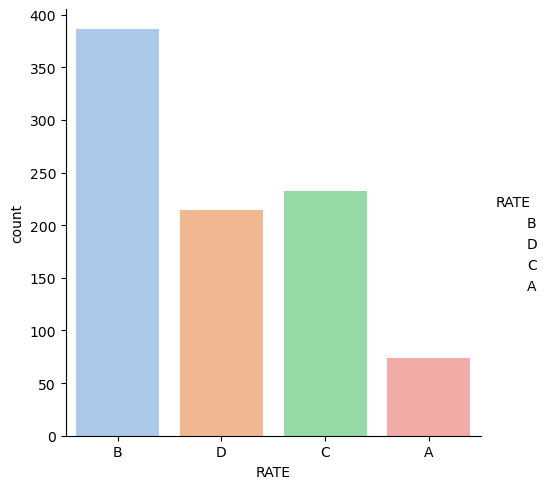

In [78]:
#1. Imputamos con k=5 y escalamos
result_df_train, result_df_test = imputar_y_escalar_KNNImputer(5,df_train_encoded,df_test_encoded,True)

sns.catplot(data=result_df_train, x="RATE", kind="count", palette="pastel")

print(result_df_train.groupby(['RATE'])['RATE'].count())
print("\n")
print(result_df_train.shape)

[0.31761594 0.15025554]


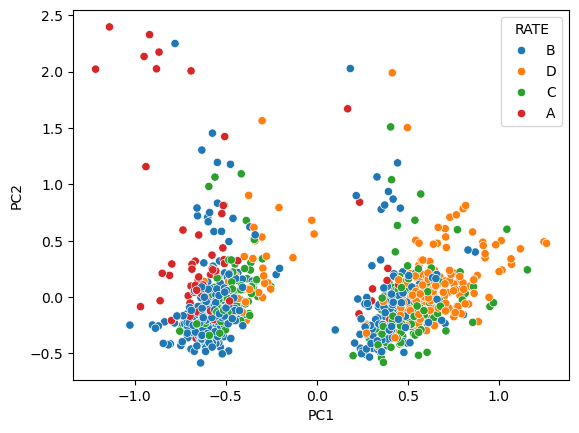

In [79]:
X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)

pca_df = pd.DataFrame(data=pca_features, columns =['PC1','PC2'])
print(pca.explained_variance_ratio_)

pca_df['RATE'] = result_df_train['RATE']

sns.scatterplot(pca_df,x="PC1",y="PC2", hue="RATE")
plt.show()

[0.3213301  0.20973323]


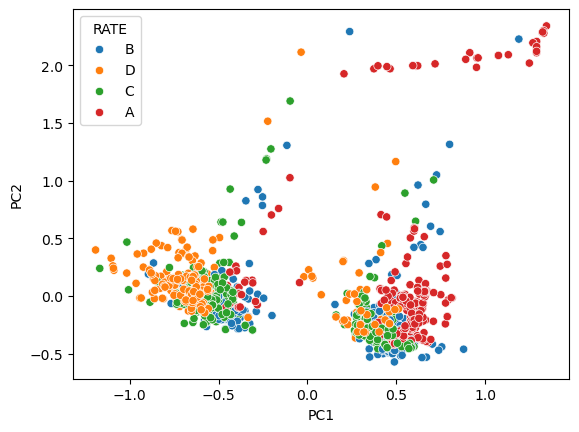

In [80]:

oversample = SMOTE()

# Partimos 80% train al que haremos SMOTE y 20% validación no RESAMPLEADO y NO entrenado posterior.
# Esto sería lo más similar a lo que tendríamos que hacer
X_a_resamplear, X_validacion, y_a_resamplear, y_validacion = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=True)

X_resampled, y_resampled = oversample.fit_resample(X_a_resamplear, y_a_resamplear)


pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_resampled)

pca_df = pd.DataFrame(data=pca_features, columns =['PC1','PC2'])
print(pca.explained_variance_ratio_)

pca_df['RATE'] = y_resampled

sns.scatterplot(pca_df,x="PC1",y="PC2", hue="RATE")
plt.show()

In [81]:
print(pca_df.groupby(['RATE'])['RATE'].count())
print("\n")
print(pca_df.shape)

RATE
A    274
B    274
C    274
D    274
Name: RATE, dtype: int64


(1096, 3)


In [82]:
np.random.seed(1234)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_resampled, y_resampled)

print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

y_pred = kNNModel_grid.predict(X_validacion)


print("Matriz de confusión:")
print(confusion_matrix(y_validacion, y_pred))
print(f"Acc. en Validación: {accuracy_score(y_validacion, y_pred)}\n\n")

Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=1)
Acc en GridSearch 0.8239103362391035
Matriz de confusión:
[[14  6  2  1]
 [11 67 29  5]
 [ 0 27 22 23]
 [ 0  8 20 37]]
Acc. en Validación: 0.5147058823529411




### SEXTO EXPERIMENTO (Acc: 0.58)
- SIN QUITAR OUTLIERS 
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  
- Viendo desbalanceo de clases y balanceando con SMOTE, y después validando con muestra EXTERNA AL RESAMPLE.
- Jugando con el SMOTE 

In [83]:
np.random.seed(1234)
#1. Imputamos con k=5 y escalamos
result_df_train, result_df_test = imputar_y_escalar_KNNImputer(5,df_train_encoded,df_test_encoded,True)
print(result_df_train.groupby(['RATE'])['RATE'].count())
print("\n")
print(result_df_train.shape)

RATE
A     74
B    386
C    232
D    214
Name: RATE, dtype: int64


(906, 41)


In [84]:
X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

In [85]:
X_a_resamplear, X_validacion, y_a_resamplear, y_validacion = train_test_split(X, y, test_size=0.2, random_state = 32, shuffle=True)

series = pd.Series(y_a_resamplear)
counts = series.value_counts()
print(counts)

RATE
B    311
C    178
D    172
A     63
Name: count, dtype: int64


In [86]:
# Estrategias de oversampling y undersampling la mayority

over = SMOTE(sampling_strategy = {'A': 150})
under = RandomUnderSampler(sampling_strategy = {'B': 250})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_a_resamplear, y_a_resamplear)
#X_resampled, y_resampled = under.fit_resample(X_a_resamplear, y_a_resamplear)

series = pd.Series(y_resampled)
counts = series.value_counts()
print(counts)

RATE
B    250
C    178
D    172
A    150
Name: count, dtype: int64


In [87]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_resampled, y_resampled)

print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

y_pred = kNNModel_grid.predict(X_validacion)


print("Matriz de confusión:")
print(confusion_matrix(y_validacion, y_pred))
print(f"Acc. en Validación: {accuracy_score(y_validacion, y_pred)}\n\n")

Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=23)
Acc en GridSearch 0.6146666666666667
Matriz de confusión:
[[ 8  3  0  0]
 [ 8 56  7  4]
 [ 3 22 17 12]
 [ 0  7  9 26]]
Acc. en Validación: 0.5879120879120879




### SÉPTIMO EXPERIMENTO (Acc: 0.584) - (SUBIDO A KAGGLE 0.609 accuracy)
- SIN QUITAR OUTLIERS 
- Imputando con KNNImputer (n_neighbors = X) y DATOS ESCALADOS
- GridSearch para obener mejor modelo, VALIDANDO CON X%  
- Viendo desbalanceo de clases y balanceando con SMOTE, y después validando con muestra EXTERNA AL RESAMPLE. Así es totalmente ajena la validación al SMOTE. 
- Jugando con el SMOTE (CAMBIANDO K IMPUTACIONES SEGÚN SMOTE)

In [88]:
np.random.seed(1234)
#1. Imputamos con k=5 y escalamos
result_df_train, result_df_test = imputar_y_escalar_KNNImputer(3,df_train_encoded,df_test_encoded,True)

print(result_df_train.groupby(['RATE'])['RATE'].count())
print("\n")
print(result_df_train.shape)


X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

X_a_resamplear, X_validacion, y_a_resamplear, y_validacion = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=True)

series = pd.Series(y_a_resamplear)
counts = series.value_counts()
print(counts)

# k_values = [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15,16]
# for k in k_values:
# Probamos con 9, porque ha dado mejores resultados antes.
k=9

# Estrategias de oversampling y undersampling la mayority
over = SMOTE(sampling_strategy = {'A': 150}, k_neighbors=k)
under = RandomUnderSampler(sampling_strategy = {'B': 250})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_a_resamplear, y_a_resamplear)

# Aplicamos algoritmo

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=5, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_resampled, y_resampled)


print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
print(f"Acc en GridSearch {kNNModel_grid.best_score_}")

y_pred = kNNModel_grid.predict(X_validacion)


print("Matriz de confusión:")
print(confusion_matrix(y_validacion, y_pred))
print(f"Acc. en Validación: {accuracy_score(y_validacion, y_pred)}\n\n")



RATE
A     74
B    386
C    232
D    214
Name: RATE, dtype: int64


(906, 41)
RATE
B    274
C    160
D    149
A     51
Name: count, dtype: int64
Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=13)
Acc en GridSearch 0.6248526620717212
Matriz de confusión:
[[17  6  0  0]
 [15 82 13  2]
 [ 2 34 20 16]
 [ 1  6 18 40]]
Acc. en Validación: 0.5845588235294118




### OCTAVO EXPERIMENTO (Acc: 0.636) - SUBIDO A KAGGLE (0.618) 
### Lo vuelvo a subir cambiando el k imputer y KAGGLE (0.635)

Hacemos un reseto tras probar múltiples cosas. 
Vamos a probar a cambiar:

- El escalado
- El resampleado
- El número de k vecinos para el knn imputer 


In [89]:
np.random.seed(1234)

# Probamos a escalar con standar scaler
result_df_train, result_df_test = imputar_y_escalar_KNNImputer(5,df_train_encoded,df_test_encoded,True, 'standar')

X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']


X_train_split, X_validacion, y_train_split, y_validacion = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=True)


k=9
# Cambiamos la estrategia de oversampling y undersampling
# Estrategias de oversampling y undersampling la mayority
over = SMOTE(sampling_strategy = {'A': 110}, k_neighbors=k)
under = RandomUnderSampler(sampling_strategy = {'B': 200})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_split, y_train_split)

print(sorted(Counter(y_resampled).items()))


[('A', 110), ('B', 200), ('C', 160), ('D', 149)]


In [90]:
# Aplicamos algoritmo
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=10, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_resampled, y_resampled)

print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")

y_pred = kNNModel_grid.predict(X_validacion)


# print("Matriz de confusión:")
# print(confusion_matrix(y_validacion, y_pred))
acc = accuracy_score(y_validacion, y_pred)
print(f"Acc. en Validación: {acc}\n\n")


test_val = result_df_test.drop('ID', inplace=False, axis=1)
test_ID = result_df_test['ID'].copy()
y_pred = kNNModel_grid.predict(test_val)

result_df = pd.DataFrame({'ID': test_ID, 'TARGET':y_pred})
result_df.to_csv(f'results/submit_{acc}.csv', index=False, sep=",")
print("Escrito resultado en csv\n")
        


Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=17)
Acc. en Validación: 0.6360294117647058


Escrito resultado en csv



### NOVENO EXPERIMENTO (Acc: 0.65) - SUBIDO A KAGGLE (0.643) 

Cambio varios aspectos:

- Hago transformaciones a las variables que presentan skewness positivo alto, así hacemos que se asemejen a una distribución normal.
- Cambio la forma de eliminación de outliers:
  - Primero, quitamos outliers con Isolation forest. 
  - Entrenamos imputador knn sobre df sin outliers
  - Imputamos sobre df con outliers

Así conseguimos imputar sin que se tengan en cuenta los outliers, por lo que los datos imputados estarán más ajustados a la "realidad"

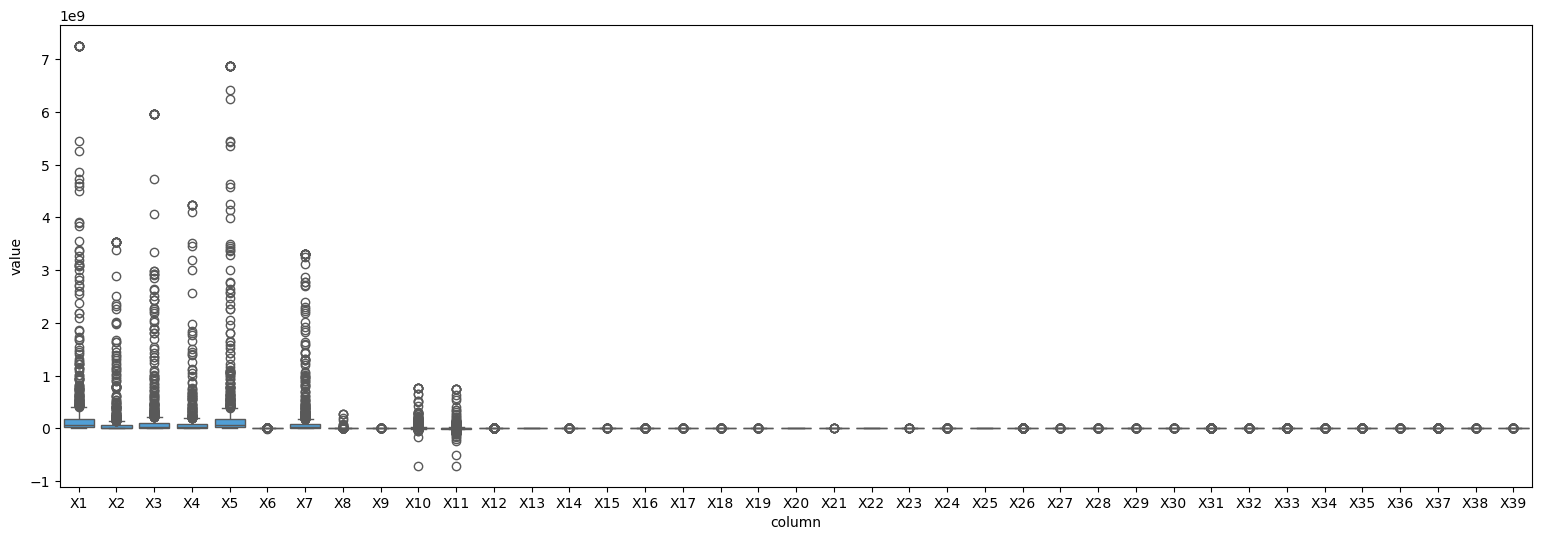

In [91]:
df_melted = df_final_train.melt(var_name='column')

plt.figure(figsize=(19,6))
sns.boxplot(data=df_melted, color="#3BA3EC", x="column", y="value")

plt.show()

<Axes: xlabel='column', ylabel='value'>

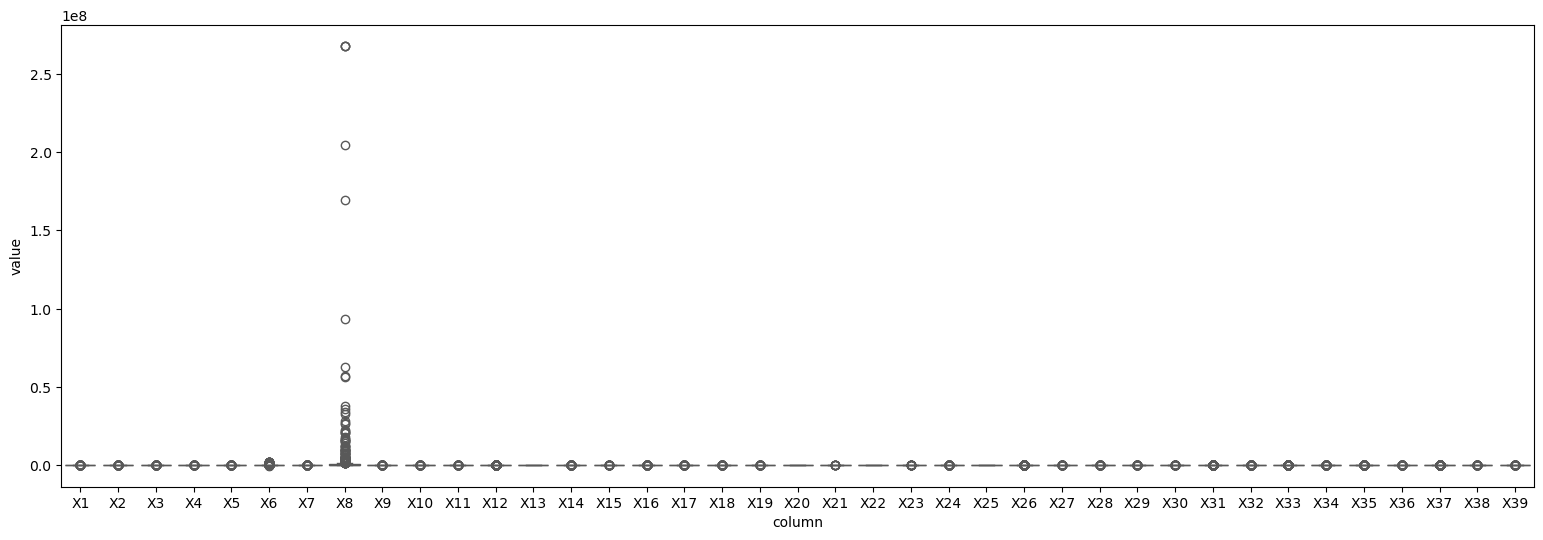

In [92]:
df_train_copy = df_final_train.copy()
df_test_copy = df_final_test.copy()

# Transformamos aquellas que están muy dispersas
df_train_copy[['X1','X2','X3','X4','X5','X7','X10','X11']] = np.sqrt(df_train_copy[['X1','X2','X3','X4','X5','X7','X10','X11']])
df_test_copy[['X1','X2','X3','X4','X5','X7','X10','X11']] = np.sqrt(df_test_copy[['X1','X2','X3','X4','X5','X7','X10','X11']])

df_melted = df_train_copy.melt(var_name='column')

plt.figure(figsize=(19,6))
sns.boxplot(data=df_melted, color="#3BA3EC", x="column", y="value")



In [93]:
# Quitamos outliers con isolation forest
modelo_isof = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                n_jobs        = -1,
                random_state  = 123,
            )

df_no_na = df_train_copy.dropna(axis=0, inplace=False)

modelo_isof.fit(X=df_no_na)
clasificacion_predicha = modelo_isof.predict(X=df_no_na)

df_no_na['clasificacion_predicha'] = clasificacion_predicha
indices_outliers = df_no_na.index[df_no_na['clasificacion_predicha'] == -1].tolist()

df_no_outliers = df_train_copy.drop(index=indices_outliers)

# Ahora, imputo sobre el dataset sin outliers
imp_train = KNNImputer(n_neighbors=5).fit(df_no_outliers)
df_train_imp = pd.DataFrame(imp_train.transform(df_train_copy), columns=df_train_copy.columns, index=df_train_copy.index)

# Hago lo mismo para test

modelo_isof_test = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.1,
                n_jobs        = -1,
                random_state  = 123,
            )

df_no_na_test = df_test_copy.dropna(axis=0, inplace=False)

modelo_isof_test.fit(X=df_no_na_test)
clasificacion_predicha = modelo_isof_test.predict(X=df_no_na_test)

df_no_na_test['clasificacion_predicha'] = clasificacion_predicha
indices_outliers = df_no_na_test.index[df_no_na_test['clasificacion_predicha'] == -1].tolist()

df_no_outliers_test = df_test_copy.drop(index=indices_outliers)

imp_test = KNNImputer(n_neighbors=5).fit(df_no_outliers_test)
df_test_imp = pd.DataFrame(imp_test.transform(df_test_copy), columns=df_test_copy.columns, index=df_test_copy.index)


# # 4. Escalamos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train_imp.to_numpy())
df_scaled = pd.DataFrame(df_scaled,index=df_train_imp.index, columns=[df_train_imp.columns])

df_scaled_test = scaler.transform(df_test_imp.to_numpy())
df_scaled_test = pd.DataFrame(df_scaled_test,index=df_test_imp.index, columns=[df_test_imp.columns])


# # 5. Componemos las columnas
columns = ['ID']
columns = np.append(columns, df_train_copy.columns)
columns = np.append(columns, 'RATE')

result_df_train = pd.merge(train_ID, df_scaled, left_index=True, right_index=True)
result_df_train = pd.merge(result_df_train, train_RATE, left_index=True, right_index=True)
result_df_train.columns = columns

columns = ['ID']
columns = np.append(columns, df_test_copy.columns)

result_df_test = pd.merge(test_ID, df_scaled_test, left_index=True, right_index=True)
result_df_test.columns = columns

In [94]:
# 6. ENTRENAMIENTO

X = result_df_train.drop(['ID','RATE'], inplace=False, axis=1)
y = result_df_train['RATE']

X_train_split, X_validacion, y_train_split, y_validacion = train_test_split(X, y, test_size=0.3, random_state = 32, shuffle=True)

# for i in np.arange(1,12):

k=9
# Estrategias de oversampling y undersampling la mayority
over = SMOTE(sampling_strategy = {'A': 110}, k_neighbors=k)
under = RandomUnderSampler(sampling_strategy = {'B': 200})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train_split, y_train_split)

param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
    'weights': ['uniform','distance']
,
}


kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=0, cv=10, n_jobs=-1, scoring='accuracy')
kNNModel_grid.fit(X_resampled, y_resampled)

print(f"Mejores parámetros {kNNModel_grid.best_estimator_}")
#print(f"K value SMOTE {k}")
# print(f"Acc en GridSearch {kNNModel_grid.best_score_}")
y_pred = kNNModel_grid.predict(X_validacion)

# print("Matriz de confusión:")
# print(confusion_matrix(y_validacion, y_pred))
acc = accuracy_score(y_validacion, y_pred)
print(f"Acc. en Validación: {acc}\n")


test_val = result_df_test.drop('ID', inplace=False, axis=1)
test_ID = result_df_test['ID'].copy()
y_pred = kNNModel_grid.predict(test_val)

result_df = pd.DataFrame({'ID': test_ID, 'TARGET':y_pred})
result_df.to_csv(f'results/submit_{acc}.csv', index=False, sep=",")
print("Escrito resultado en csv")


Mejores parámetros KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=9,
                     weights='distance')
Acc. en Validación: 0.6139705882352942

Escrito resultado en csv


### DÉCIMO EXPERIMENTO (Acc: 0.6538) - SUBIDO A KAGGLE (0.639) 

Consolido varios aspectos:
- Mejor scaler: StandarScaler
- Transformación de variables con skewness a escala raíz cuadrada mejora accuracy
- Estrategias de Downsampling y oversampling están funcionando. 
- Aplicaremos optimización usando framework OPTUNA

In [95]:
# Transformamos
df_train_copy = df_final_train.copy()
df_test_copy = df_final_test.copy()

# Escala raíz cuadrada a las que se dispersan mucho
df_train_copy[['X1','X2','X3','X4','X5','X6','X7','X10','X11']] = np.sqrt(df_train_copy[['X1','X2','X3','X4','X5','X6','X7','X10','X11']])
df_test_copy[['X1','X2','X3','X4','X5','X6','X7','X10','X11']] = np.sqrt(df_test_copy[['X1','X2','X3','X4','X5','X6','X7','X10','X11']])


In [96]:
# Funciones individuales para probar dentro de la función de optimización 
# que propone OPTUNA https://optuna.org/

# Funciones desarrolladas por compañero de Equipo: Valentino Lugli
# y para el caso particular de Knn

'''
Función para seleccionar top k features 
'''
def feature_top(X_train_in, y_train_in, X_val_in, X_test_in, k):
    fs = SelectKBest(score_func=f_classif, k=k)

    X_train_out = pd.DataFrame(fs.fit_transform(X_train_in, y_train_in))
    X_val_out   = pd.DataFrame(fs.transform(X_val_in))
    X_test_out  = pd.DataFrame(fs.transform(X_test_in))

    return X_train_out, X_val_out, X_test_out

'''
Función para seleccionar k features basado en percentil
'''
def feature_perc(X_train_in, y_train_in, X_val_in, X_test_in, percent):
    fs = SelectPercentile(score_func=f_classif, percentile=percent)

    X_train_out = pd.DataFrame(fs.fit_transform(X_train_in, y_train_in))
    X_val_out   = pd.DataFrame(fs.transform(X_val_in))
    X_test_out  = pd.DataFrame(fs.transform(X_test_in))

    return X_train_out, X_val_out, X_test_out


'''
    Obtención de características similares
'''
def get_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    # print('Correlated Columns are: {}'.format(sorted(drops)))
    return drops

'''
Eliminación de características similares
'''
def delete_corr(X_train_in, X_val_in, X_test_in, corr_val):
    collinear_cols = get_collinear_features(X_train_in, corr_val)
    X_train_out = X_train_in.drop(columns=collinear_cols)
    X_val_out   = X_val_in.drop(columns=collinear_cols)
    X_test_out  = X_test_in.drop(columns=collinear_cols)

    return X_train_out, X_val_out, X_test_out

'''
Aplicación de estrategias de DownSampling
'''
def down_sample(X_train_in, y_train_in,neigh):
    X_train_out, y_train_out = NearMiss(version=2, n_neighbors_ver3=neigh).fit_resample(X_train_in, y_train_in)
    #X_train_out, y_train_out = RandomUnderSampler(random_state=0,sampling_strategy='majority').fit_resample(X_train_in, y_train_in)

    return X_train_out, y_train_out

'''
Aplicación de estrategias de OverSampling
'''
def up_sample(X_train_in, y_train_in, neigh):
    sm = SMOTE(random_state=16, k_neighbors=neigh)
    X_train_out, y_train_out = sm.fit_resample(X_train_in, y_train_in)

    return X_train_out, y_train_out

'''
Mostrar estadísticas knn
'''
def knn_stats(results, show_cf = True):
    
    header = ["Variant", "F1 Score", "Train Acc", "Test Acc", "Parameters"]
    body = []
    matrices = []

    for m in results:
        body.append([m, results[m]["val_stats"]["macro avg"]["f1-score"], results[m]["train_stats"]["accuracy"] * 100, results[m]["val_stats"]["accuracy"] * 100, results[m]["params"]])
        matrices.append(results[m]["val_conf"])
    print(tabulate(body, headers=header, floatfmt=".4f"))

    if(show_cf):
        fig, axes = plt.subplots(nrows=1, ncols=len(matrices), figsize=(18, 4))

        tick_labels = ["A", "B", "C", "D"]

        if(len(matrices) > 1):
            axes = axes.flatten()
        else:
            curr_ax = axes

        for i, model in enumerate(results):
            if(len(matrices) > 1):
                curr_ax = axes[i]

            sns.heatmap(matrices[i], ax=curr_ax, annot=True, xticklabels=tick_labels, yticklabels=tick_labels)
            curr_ax.title.set_text(model)
            curr_ax.set_xlabel("Predicted") 
            curr_ax.set_ylabel("Real") 

        plt.tight_layout()
        plt.show()

'''
Crear df con las predicciones en formato KAGGLE
'''
def to_kaggle(pred, id, path=".", fname="kaggle_out"):
    kaggle_dict = {"ID" : id, "RATE" : pred}
    pd.DataFrame(data=kaggle_dict).to_csv("{}submit_optuna_{}.csv".format(path, fname), index=False)

'''
Obtener predicciones y guardar a csv
'''
def get_kaggle_pred(model, data, id, path=".", fname="kaggle_out"):
    model_pred = model.predict(data)
    to_kaggle(model_pred, id, path=path, fname=fname)


In [97]:
'''
Clase TuningParams de Optuna.

Esta clase contiene el método objective_function,
el cual optimizará lo que devuelva, en este caso 
la variable fitness (return fitness)

'''
class TuningParams:
    def __init__(self, X_data, y_data, X_test) -> None:
        self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(X_data, 
                                                            y_data, stratify=y_data, 
                                                            test_size=0.2, 
                                                            random_state=16)
        self.X_test = X_test.drop(columns=["ID"])
        self.X_test_ids = X_test["ID"]
        self.trial = {}



    def objective_function(self, trial):
        X_train = self.X_train
        y_train = self.y_train
        X_val   = self.X_val
        y_val   = self.y_val
        X_test  = self.X_test

        # Feature Selection
        do_feat_sel = trial.suggest_categorical("feature_selection", [True, False])

        if(do_feat_sel):
            sel_type = trial.suggest_categorical("feat_sel_type", ["top", "perc"])

            if(sel_type == "top"):
                best_k = trial.suggest_int("top_k", 5, 25)
                X_train, X_val, X_test = feature_top(X_train, y_train, X_val, X_test, best_k)
            else:
                perc = trial.suggest_int("perc", 5, 25)
                X_train, X_val, X_test = feature_perc(X_train, y_train, X_val, X_test, perc)

        # Correlated Columns
        delete_correlated = trial.suggest_categorical("delete_correlated", [True, False])
        if(delete_correlated):
            corr_val = trial.suggest_float("corr_value", 0.5, 0.8)
            X_train, X_val, X_test = delete_corr(X_train, X_val, X_test, corr_val)
        

        # Under/Oversampling
        do_resampling = trial.suggest_categorical("resample", [True, False])

        if(do_resampling):
            kind = trial.suggest_categorical("kind", ["up", "down"])
            if(kind == "up"):
                neigs = trial.suggest_int("up_neighs", 2, 31)
                X_train, y_train = up_sample(X_train, y_train, neigs)
            else:
                # sampling_strat = trial.suggest_categorical('A', ["60", "70"])
                neigs = trial.suggest_int("up_neighs", 2, 31)
                X_train, y_train = down_sample(X_train, y_train,neigs)


        try:                                 
            algo = trial.suggest_categorical("algorithm", ['ball_tree', 'kd_tree', 'brute', 'auto'])     
            n_neighbors = trial.suggest_int("n_neighbors", 1, 33)
            weights = trial.suggest_categorical("weights", ['uniform', 'distance'])
            metric = trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski','chebyshev'])

            model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, algorithm=algo)

            y_train_pred = model.fit(X_train, y_train).predict(X_train)
            y_val_pred   = model.predict(X_val)
            y_test_pred  = model.predict(X_test)

        except Exception:
            return -1

        self.trial[trial.number] = {}
        self.trial[trial.number]["train_stats"] = classification_report(y_train, y_train_pred, output_dict=True, zero_division=0)
        self.trial[trial.number]["val_stats"]   = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
        self.trial[trial.number]["val_conf"]    = confusion_matrix(y_val, y_val_pred)
        self.trial[trial.number]["train_pred"]  = y_train_pred
        self.trial[trial.number]["val_pred"]    = y_val_pred
        self.trial[trial.number]["test_pred"]   = y_test_pred
        self.trial[trial.number]["model"]       = model
        
        act_acc = self.trial[trial.number]["val_stats"]["accuracy"]
        act_f1  = self.trial[trial.number]["val_stats"]["macro avg"]["f1-score"]

        fitness = np.mean([act_acc, act_f1])

        self.trial[trial.number]["fitness"] = fitness

        return fitness

    def get_trial_test(self, num_trial):
        return self.trial[num_trial]

    def get_k_best_trials(self, study, k=5, save_kaggle=False, show_cf=True, path="."):
        trials = study.best_trials[:k]
        results = {}
        for t in trials:
            act_name = "{}__{}".format(study.study_name, t.number)
            act_result = self.get_trial_test(t.number)
            act_result["params"] = t.params

            results[act_name] = act_result
            if(save_kaggle):
                self.trial_to_kaggle(act_result, path = path, fname = act_name)

        knn_stats(results, show_cf=show_cf)
        return results

    def trial_to_kaggle(self, trial, path=".", fname = "kaggle_out"):
        to_kaggle(trial["test_pred"], self.X_test_ids, path=path, fname = fname)


In [98]:
# Una vez definida la clase TuningParams y el método objetive_function, inicializamos objeto de la clase
# y aplicamos sobre método create_study de optuna, indicando que queremos "maximizar". 
df_credit_x = result_df_train.drop(['ID','RATE'],axis=1)
df_credit_y = result_df_train["RATE"]

df_test = result_df_test
X_test     = df_test.drop(columns=["ID"],axis=1)
X_test_ids = df_test["ID"]


BNTuning = TuningParams(df_credit_x, df_credit_y, df_test)
study = optuna.create_study(direction="maximize", study_name="tuning__{}".format(datetime.datetime.now().strftime("%Y%m%d-%H%M%S")), storage="sqlite:///db.sqlite3")

study.optimize(BNTuning.objective_function, n_trials=1000)

[I 2024-01-15 19:51:32,662] A new study created in RDB with name: tuning__20240115-195132


[I 2024-01-15 19:51:33,011] Trial 0 finished with value: 0.5974158095409609 and parameters: {'feature_selection': False, 'delete_correlated': True, 'corr_value': 0.7617152656777841, 'resample': False, 'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5974158095409609.
[I 2024-01-15 19:51:33,292] Trial 1 finished with value: 0.5467881572740987 and parameters: {'feature_selection': True, 'feat_sel_type': 'perc', 'perc': 9, 'delete_correlated': True, 'corr_value': 0.7148735975540558, 'resample': False, 'algorithm': 'auto', 'n_neighbors': 22, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.5974158095409609.
[I 2024-01-15 19:51:33,574] Trial 2 finished with value: 0.5574951691494522 and parameters: {'feature_selection': False, 'delete_correlated': False, 'resample': False, 'algorithm': 'ball_tree', 'n_neighbors': 14, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.59741

In [99]:
study.best_params

{'feature_selection': False,
 'delete_correlated': True,
 'corr_value': 0.5822019614250015,
 'resample': False,
 'algorithm': 'kd_tree',
 'n_neighbors': 5,
 'weights': 'distance',
 'metric': 'manhattan'}

In [100]:
a = study.best_trials

In [101]:
a

[FrozenTrial(number=28, state=1, values=[0.6408734506103393], datetime_start=datetime.datetime(2024, 1, 15, 19, 51, 42, 62817), datetime_complete=datetime.datetime(2024, 1, 15, 19, 51, 42, 369422), params={'feature_selection': False, 'delete_correlated': True, 'corr_value': 0.5822019614250015, 'resample': False, 'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'feature_selection': CategoricalDistribution(choices=(True, False)), 'delete_correlated': CategoricalDistribution(choices=(True, False)), 'corr_value': FloatDistribution(high=0.8, log=False, low=0.5, step=None), 'resample': CategoricalDistribution(choices=(True, False)), 'algorithm': CategoricalDistribution(choices=('ball_tree', 'kd_tree', 'brute', 'auto')), 'n_neighbors': IntDistribution(high=33, log=False, low=1, step=1), 'weights': CategoricalDistribution(choices=('uniform', 'distance')), 'metric': CategoricalDistribu

In [102]:
study.best_trial.params

{'feature_selection': False,
 'delete_correlated': True,
 'corr_value': 0.5822019614250015,
 'resample': False,
 'algorithm': 'kd_tree',
 'n_neighbors': 5,
 'weights': 'distance',
 'metric': 'manhattan'}

In [103]:
self_trials = BNTuning.trial

In [104]:
BNTuning.trial = self_trials

Variant                        F1 Score    Train Acc    Test Acc  Parameters
---------------------------  ----------  -----------  ----------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
tuning__20240115-195132__28      0.6279     100.0000     65.3846  {'feature_selection': False, 'delete_correlated': True, 'corr_value': 0.5822019614250015, 'resample': False, 'algorithm': 'kd_tree', 'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan'}


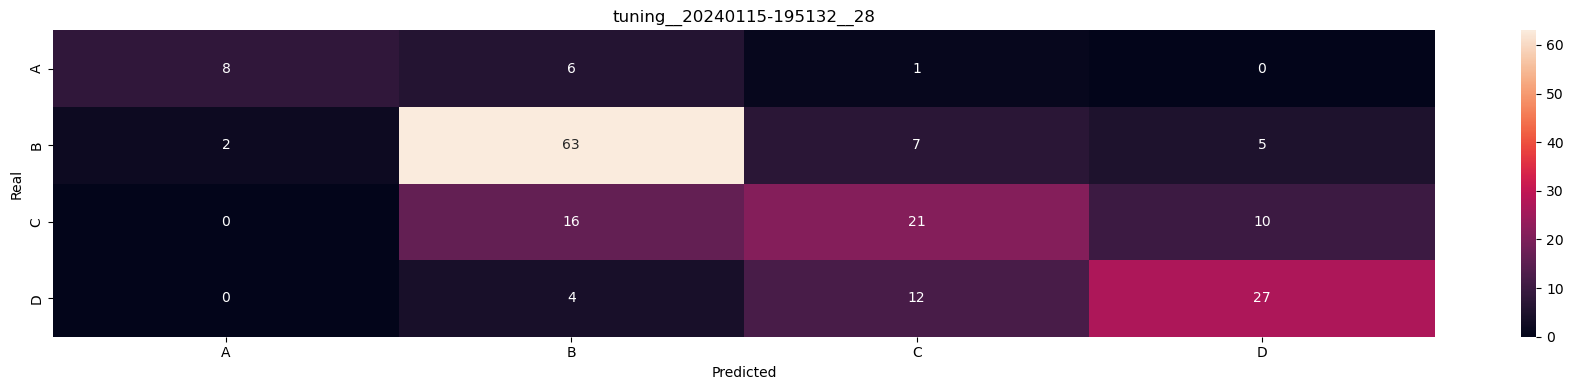

In [105]:
out = BNTuning.get_k_best_trials(study, path='results/', k=1,save_kaggle=True)

## Gráficas para presentación Asignatura

In [3]:
kaggle_public_pred =  [0.609, 0.592, 0.570, 0.592, 0.553, 0.618, 0.635, 0.575, 0.570, 0.630, 0.643, 0.639, 0.596, 0.609, 0.626, 0.596, 0.639, 0.605, 0.609]

kaggle_private_pred = [0.608, 0.589, 0.583, 0.634, 0.576, 0.608, 0.589, 0.544, 0.544, 0.628, 0.608, 0.673, 0.602, 0.647, 0.570, 0.653, 0.583, 0.641, 0.602]

# 0 - 10 -> optimización normal
# 11 - 18 -> optimización con optuna

kaggle = pd.DataFrame({'public': kaggle_public_pred, 'private':kaggle_private_pred})
kaggle.head()

,public,private
0,0.609,0.608
1,0.592,0.589
2,0.570,0.583
3,0.592,0.634
4,0.553,0.576


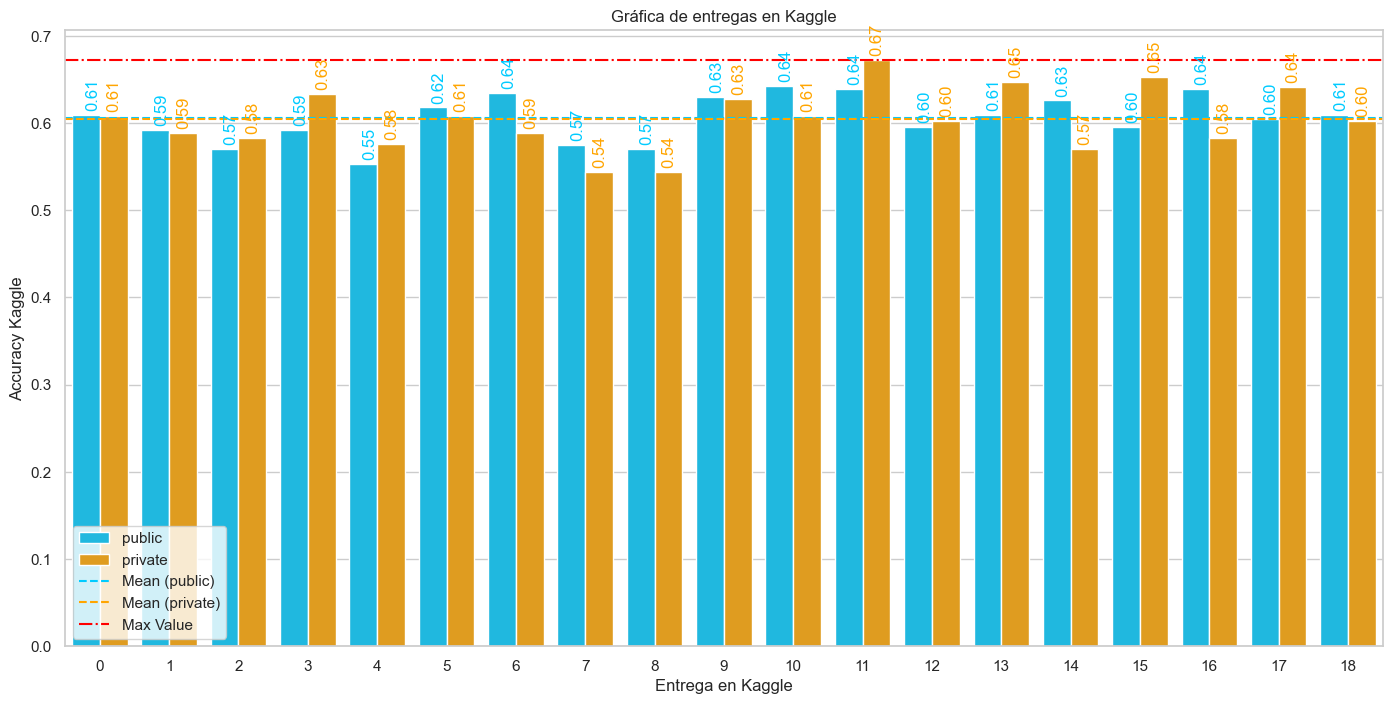

In [53]:
# Ajusta la posición de las barras para que estén una al lado de la otra
bar_positions = np.arange(len(kaggle['public']))
# Combina los datos de 'public' y 'private' en un solo DataFrame
combined_data = pd.DataFrame({'X': np.tile(bar_positions, 2),
                              'Value': np.concatenate([kaggle['public'], kaggle['private']]),
                              'Category': np.repeat(['public', 'private'], len(kaggle['public']))})

# Crea la figura y los ejes
plt.figure(figsize=(17, 8))

# Barplot combinado
sns.barplot(x='X', y='Value', hue='Category', data=combined_data, palette=['#00cbff', 'orange'])

# Calcula y agrega las líneas horizontales para las medias
mean_public = np.mean(kaggle['public'])
mean_private = np.mean(kaggle['private'])
max_value = np.max(list(kaggle['public']) + list(kaggle['private']))

plt.axhline(y=mean_public, color='#00cbff', linestyle='--', label='Mean (public)')
plt.axhline(y=mean_private, color='orange', linestyle='--', label='Mean (private)')
plt.axhline(y=max_value, color='red', linestyle='-.', label='Max Value')


for idx, row in combined_data.iterrows():
    ha_value = 'right' if row['Category'] == 'public' else 'left'
    plt.annotate(f'{row["Value"]:.2f}', 
                 xy=(row["X"], row["Value"]), 
                 xytext=(5 if row['Category'] == 'private' else 0, 3), 
                 textcoords="offset points", 
                 ha=ha_value, 
                 va='bottom', 
                 rotation=90, 
                 color='#00cbff' if row["Category"] == 'public' else 'orange')


# Configura los ejes y la leyenda
plt.xlabel('Entrega en Kaggle')
plt.ylabel('Accuracy Kaggle')
plt.title('Gráfica de entregas en Kaggle')
plt.legend(loc='lower left')